# Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
from google.colab import files
uploaded = files.upload()

libMLP = ctypes.CDLL("/content/libMLP.so")

libMLP.MultiLevelPerceptron_new_2.restype = ctypes.c_void_p
libMLP.MultiLevelPerceptron_new_3.restype = ctypes.c_void_p
libMLP.MultiLevelPerceptron_new_4.restype = ctypes.c_void_p
libMLP.MultiLevelPerceptron_new_2.argtypes = [ctypes.c_bool, ctypes.c_int, ctypes.c_int]
libMLP.MultiLevelPerceptron_new_3.argtypes = [ctypes.c_bool, ctypes.c_int, ctypes.c_int, ctypes.c_int]
libMLP.MultiLevelPerceptron_new_4.argtypes = [ctypes.c_bool, ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_int]

libMLP.MultiLevelPerceptron_addElement.argtypes = [ctypes.c_void_p, ctypes.c_int]
libMLP.MultiLevelPerceptron_printElements.argtypes = [ctypes.c_void_p]
libMLP.MultiLevelPerceptron_train.argtypes = [ctypes.c_void_p, ctypes.c_int, ctypes.c_double]
libMLP.MultiLevelPerceptron_generatePrediction.argtypes = [ctypes.c_void_p, ctypes.c_int]
libMLP.MultiLevelPerceptron_getPrediction.argtypes = [ctypes.c_void_p, ctypes.c_int]
libMLP.MultiLevelPerceptron_getPrediction.restype = ctypes.c_double
libMLP.MultiLevelPerceptron_getMSESize.argtypes = [ctypes.c_void_p]
libMLP.MultiLevelPerceptron_getMSESize.restype = ctypes.c_int
libMLP.MultiLevelPerceptron_MSE.argtypes = [ctypes.c_void_p, ctypes.c_int]
libMLP.MultiLevelPerceptron_MSE.restype = ctypes.c_double

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [6]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

mlp = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )

for i in range(3):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(0.5), ctypes.c_double(0.5) )

for i in range(1) :
  print( libMLP.MultiLevelPerceptron_getPrediction(mlp, i) )

all_grid_points = []
all_grid_points_colors = []
for x1 in range(100, 300):
  for x2 in range(100, 300):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p])
    all_grid_points_colors.append('lightblue' if predicted_value >= 0 else 'pink')

all_grid_points = np.array(all_grid_points)

0.9903228428603522


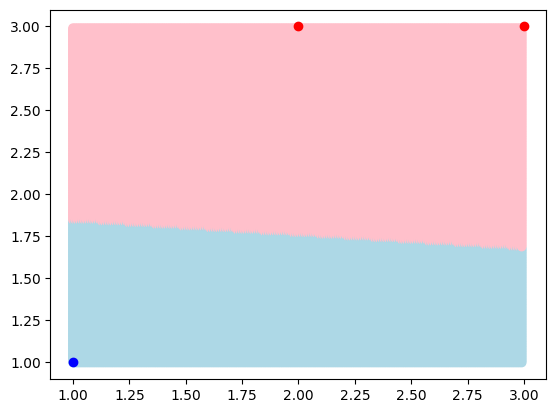

<Figure size 640x480 with 0 Axes>

In [7]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [8]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

mlp = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )

for i in range(100):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
all_grid_points_colors = []
for x1 in range(100, 300):
  for x2 in range(100, 300):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p])
    all_grid_points_colors.append('lightblue' if predicted_value >= 0 else 'pink')

all_grid_points = np.array(all_grid_points)

/tmp/ipython-input-3309195317.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )


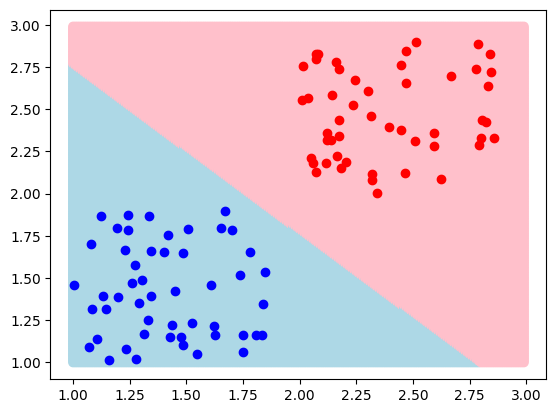

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [10]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

mlp = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )

for i in range(4):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
all_grid_points_colors = []
for x1 in range(0, 100):
  for x2 in range(0, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p])
    all_grid_points_colors.append('lightblue' if predicted_value >= 0 else 'pink')

all_grid_points = np.array(all_grid_points)

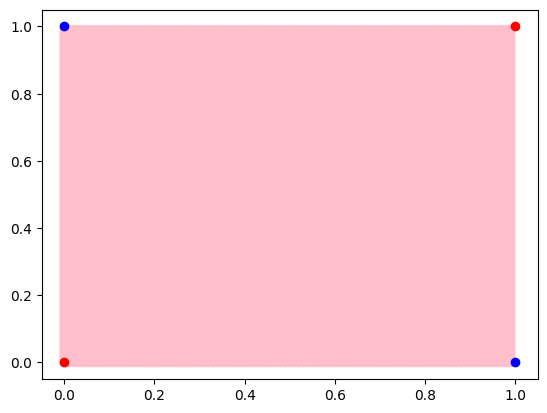

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [12]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

mlp = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )

for i in range(500):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
all_grid_points_colors = []
for x1 in range(-100, 100):
  for x2 in range(-100, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p])
    all_grid_points_colors.append('lightblue' if predicted_value >= 0 else 'pink')

all_grid_points = np.array(all_grid_points)


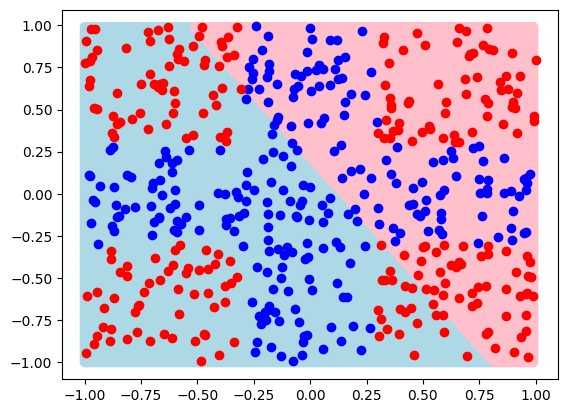

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [14]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [-1, -1, -1]for p in X])

X = X[[not np.all(arr == [-1, -1, -1]) for arr in Y]]
Y = Y[[not np.all(arr == [-1, -1, -1]) for arr in Y]]

bluePoints = np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))
redPoints = np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))
greenPoints = np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))

blueMLP = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )
redMLP = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )
greenMLP = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )

for point in bluePoints:
  libMLP.MultiLevelPerceptron_addElement( blueMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(1.0) )
  libMLP.MultiLevelPerceptron_addElement( redMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( greenMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )

for point in redPoints:
  libMLP.MultiLevelPerceptron_addElement( blueMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( redMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(1.0) )
  libMLP.MultiLevelPerceptron_addElement( greenMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )

for point in greenPoints:
  libMLP.MultiLevelPerceptron_addElement( blueMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( redMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( greenMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(1.0) )

libMLP.MultiLevelPerceptron_train( blueMLP, 100000, 0.001, 0 )
libMLP.MultiLevelPerceptron_train( redMLP, 100000, 0.001, 0 )
libMLP.MultiLevelPerceptron_train( greenMLP, 100000, 0.001, 0 )

all_grid_points = []
all_grid_points_colors = []
for x1 in range(-100, 100):
  for x2 in range(-100, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( blueMLP, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    libMLP.MultiLevelPerceptron_generatePrediction( redMLP, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    libMLP.MultiLevelPerceptron_generatePrediction( greenMLP, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    blue_predicted_value = libMLP.MultiLevelPerceptron_getPrediction(blueMLP, 0)
    red_predicted_value = libMLP.MultiLevelPerceptron_getPrediction(redMLP, 0)
    green_predicted_value = libMLP.MultiLevelPerceptron_getPrediction(greenMLP, 0)
    all_grid_points.append([x1_p, x2_p])
    if( red_predicted_value < blue_predicted_value and green_predicted_value < blue_predicted_value ):
      all_grid_points_colors.append('lightblue')
    if( blue_predicted_value < red_predicted_value and green_predicted_value < red_predicted_value ):
      all_grid_points_colors.append('pink')
    if( red_predicted_value < green_predicted_value and blue_predicted_value < green_predicted_value ):
      all_grid_points_colors.append('lightgreen')

all_grid_points = np.array(all_grid_points)

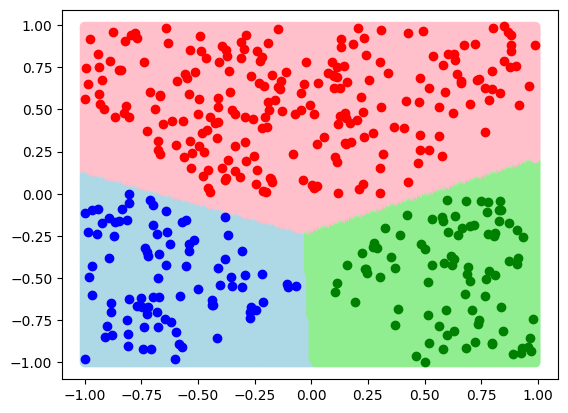

<Figure size 640x480 with 0 Axes>

In [15]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(bluePoints[:,0], bluePoints[:,1], color='blue')
plt.scatter(redPoints[:,0], redPoints[:,1], color='red')
plt.scatter(greenPoints[:,0], greenPoints[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [16]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

bluePoints = np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))
redPoints = np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))
greenPoints = np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))

blueMLP = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )
redMLP = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )
greenMLP = libMLP.MultiLevelPerceptron_new_2( True, 2, 1 )

for point in bluePoints:
  libMLP.MultiLevelPerceptron_addElement( blueMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(1.0) )
  libMLP.MultiLevelPerceptron_addElement( redMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( greenMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )

for point in redPoints:
  libMLP.MultiLevelPerceptron_addElement( blueMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( redMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(1.0) )
  libMLP.MultiLevelPerceptron_addElement( greenMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )

for point in greenPoints:
  libMLP.MultiLevelPerceptron_addElement( blueMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( redMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(-1.0) )
  libMLP.MultiLevelPerceptron_addElement( greenMLP, 3, ctypes.c_double(point[0]), ctypes.c_double(point[1]), ctypes.c_double(1.0) )

libMLP.MultiLevelPerceptron_train( blueMLP, 100000, 0.001, 0 )
libMLP.MultiLevelPerceptron_train( redMLP, 100000, 0.001, 0 )
libMLP.MultiLevelPerceptron_train( greenMLP, 100000, 0.001, 0 )

all_grid_points = []
all_grid_points_colors = []
for x1 in range(-100, 100):
  for x2 in range(-100, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( blueMLP, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    libMLP.MultiLevelPerceptron_generatePrediction( redMLP, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    libMLP.MultiLevelPerceptron_generatePrediction( greenMLP, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    blue_predicted_value = libMLP.MultiLevelPerceptron_getPrediction(blueMLP, 0)
    red_predicted_value = libMLP.MultiLevelPerceptron_getPrediction(redMLP, 0)
    green_predicted_value = libMLP.MultiLevelPerceptron_getPrediction(greenMLP, 0)
    all_grid_points.append([x1_p, x2_p])
    if( red_predicted_value < blue_predicted_value and green_predicted_value < blue_predicted_value ):
      all_grid_points_colors.append('lightblue')
    if( blue_predicted_value < red_predicted_value and green_predicted_value < red_predicted_value ):
      all_grid_points_colors.append('pink')
    if( red_predicted_value < green_predicted_value and blue_predicted_value < green_predicted_value ):
      all_grid_points_colors.append('lightgreen')

all_grid_points = np.array(all_grid_points)

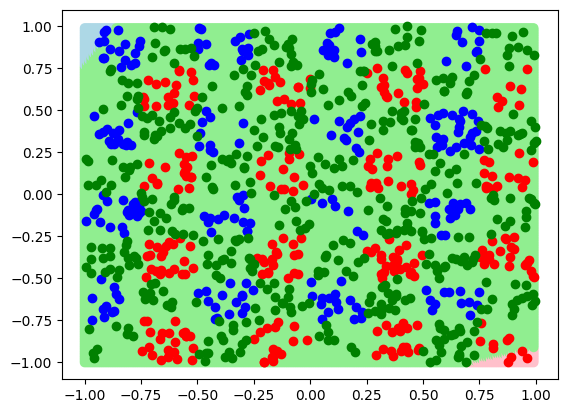

<Figure size 640x480 with 0 Axes>

In [17]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(bluePoints[:,0], bluePoints[:,1], color='blue')
plt.scatter(redPoints[:,0], redPoints[:,1], color='red')
plt.scatter(greenPoints[:,0], greenPoints[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [29]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

mlp = libMLP.MultiLevelPerceptron_new_2( False, 1, 1 )

for i in range(2):
  libMLP.MultiLevelPerceptron_addElement( mlp, 2, ctypes.c_double(X[i][0]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
for x in range(100, 200):
  x_p = x / 100.0
  libMLP.MultiLevelPerceptron_generatePrediction( mlp, 1, ctypes.c_double(x_p) )
  predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
  all_grid_points.append([x_p, predicted_value])

all_grid_points = np.array(all_grid_points)

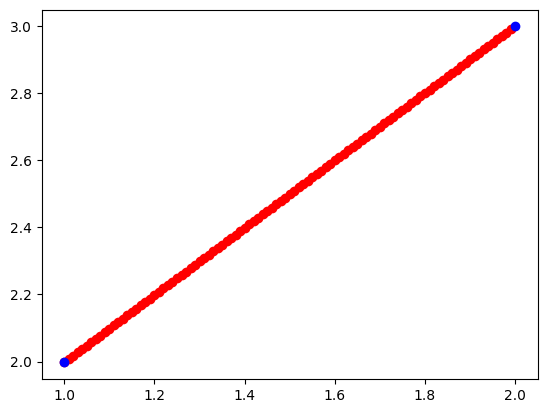

<Figure size 640x480 with 0 Axes>

In [30]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = 'red')
plt.scatter(X,Y,c='blue')
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [68]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

mlp = libMLP.MultiLevelPerceptron_new_2( False, 1, 1 )

for i in range(3):
  libMLP.MultiLevelPerceptron_addElement( mlp, 2, ctypes.c_double(X[i][0]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
for x in range(100, 300):
  x_p = x / 100.0
  libMLP.MultiLevelPerceptron_generatePrediction( mlp, 1, ctypes.c_double(x_p) )
  predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
  all_grid_points.append([x_p, predicted_value])

all_grid_points = np.array(all_grid_points)

mlp1 = libMLP.MultiLevelPerceptron_new_2( False, 1, 1 )
mlp2 = libMLP.MultiLevelPerceptron_new_2( False, 1, 1 )

libMLP.MultiLevelPerceptron_addElement( mlp1, 2, ctypes.c_double(X[0][0]), ctypes.c_double(Y[0]) )
libMLP.MultiLevelPerceptron_addElement( mlp1, 2, ctypes.c_double(X[1][0]), ctypes.c_double(Y[1]) )
libMLP.MultiLevelPerceptron_addElement( mlp2, 2, ctypes.c_double(X[1][0]), ctypes.c_double(Y[1]) )
libMLP.MultiLevelPerceptron_addElement( mlp2, 2, ctypes.c_double(X[2][0]), ctypes.c_double(Y[2]) )

libMLP.MultiLevelPerceptron_train( mlp1, 100000, 0.001, 0 )
libMLP.MultiLevelPerceptron_train( mlp2, 1000000, 0.001, 0 )

all_grid_points_bis = []
for x in range(100, 200):
  x_p = x / 100.0
  libMLP.MultiLevelPerceptron_generatePrediction( mlp1, 1, ctypes.c_double(x_p) )
  predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp1, 0)
  all_grid_points_bis.append([x_p, predicted_value])
for x in range(200, 300):
  x_p = x / 100.0
  libMLP.MultiLevelPerceptron_generatePrediction( mlp2, 1, ctypes.c_double(x_p) )
  predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp2, 0)
  all_grid_points_bis.append([x_p, predicted_value])

all_grid_points_bis = np.array(all_grid_points_bis)

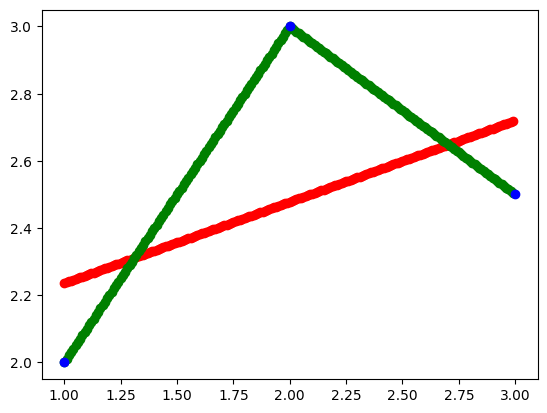

<Figure size 640x480 with 0 Axes>

In [69]:
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = 'red')
plt.scatter(all_grid_points_bis[:, 0], all_grid_points_bis[:, 1], c = 'green')
plt.scatter(X,Y,c='blue')
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [48]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

mlp = libMLP.MultiLevelPerceptron_new_2( False, 2, 1 )

for i in range(3):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
for x1 in range(100, 300):
  for x2 in range(100, 200):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p, predicted_value])

all_grid_points = np.array(all_grid_points)

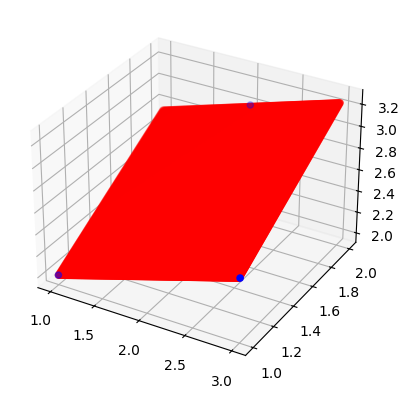

<Figure size 640x480 with 0 Axes>

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_grid_points[:, 0], all_grid_points[:, 1], all_grid_points[:, 2], c='red')
ax.scatter(X[:, 0], X[:, 1], Y, c='blue')
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [53]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

mlp = libMLP.MultiLevelPerceptron_new_2( False, 2, 1 )

for i in range(3):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
for x1 in range(100, 300):
  for x2 in range(100, 300):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p, predicted_value])

all_grid_points = np.array(all_grid_points)

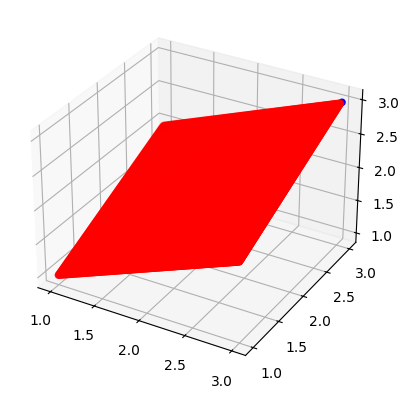

<Figure size 640x480 with 0 Axes>

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_grid_points[:, 0], all_grid_points[:, 1], all_grid_points[:, 2], c='red')
ax.scatter(X[:, 0], X[:, 1], Y, c='blue')
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [58]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

mlp = libMLP.MultiLevelPerceptron_new_2( False, 2, 1 )

for i in range(3):
  libMLP.MultiLevelPerceptron_addElement( mlp, 3, ctypes.c_double(X[i][0]), ctypes.c_double(X[i][1]), ctypes.c_double(Y[i]) )

libMLP.MultiLevelPerceptron_train( mlp, 100000, 0.001, 0 )

all_grid_points = []
for x1 in range(0, 100):
  for x2 in range(0, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    libMLP.MultiLevelPerceptron_generatePrediction( mlp, 2, ctypes.c_double(x1_p), ctypes.c_double(x2_p) )
    predicted_value = libMLP.MultiLevelPerceptron_getPrediction(mlp, 0)
    all_grid_points.append([x1_p, x2_p, predicted_value])

all_grid_points = np.array(all_grid_points)

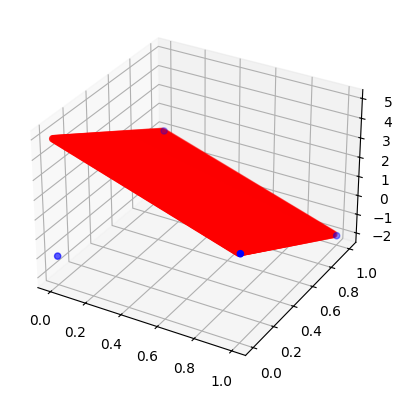

<Figure size 640x480 with 0 Axes>

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_grid_points[:, 0], all_grid_points[:, 1], all_grid_points[:, 2], c='red')
ax.scatter(X[:, 0], X[:, 1], Y, c='blue')
plt.show()
plt.clf()